In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
data = pd.read_csv("Medicaid_Chronic_Conditions__Inpatient_Admissions_and_Emergency_Room_Visits.csv")

## Data inspection


In [3]:
data.groupby(["Major Diagnostic Category"])[ "Episode Disease Category"]

In [4]:
data.head()

,Year,Zip Code,Primary County,Dual Eligible,Major Diagnostic Category,Episode Disease Category,Beneficiaries with Condition,Beneficiaries with Admissions,Total Inpatient Admissions,Beneficiaries with ER Visits,Total ER Visits
0,2014,13339,Montgomery,Non-Dual,Mental Diseases And Disorders,Depressive and Other Psychoses,62,14,27,35,104
1,2012,12570,Dutchess,Non-Dual,Mental Diseases And Disorders,Chronic Stress and Anxiety Diagnoses,24,5,15,12,29
2,2013,14612,Monroe,Non-Dual,Diabetes Mellitus,Diabetes,175,48,88,70,221
3,2014,10032,New York,Non-Dual,Mental Diseases And Disorders,Chronic Stress and Anxiety Diagnoses,831,145,376,380,992
4,2014,10314,Richmond,Non-Dual,Mental Diseases And Disorders,Bi-Polar Disorder,216,90,255,107,384


## Show each of the column names and their data types.


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98691 entries, 0 to 98690
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Year                           98691 non-null  int64 
 1   Zip Code                       98691 non-null  int64 
 2   Primary County                 98691 non-null  object
 3   Dual Eligible                  98691 non-null  object
 4   Major Diagnostic Category      98691 non-null  object
 5   Episode Disease Category       98691 non-null  object
 6   Beneficiaries with Condition   98691 non-null  int64 
 7   Beneficiaries with Admissions  98691 non-null  int64 
 8   Total Inpatient Admissions     98691 non-null  int64 
 9   Beneficiaries with ER Visits   98691 non-null  int64 
 10  Total ER Visits                98691 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 8.3+ MB


In [6]:
data.isnull().sum()

Year                             0
Zip Code                         0
Primary County                   0
Dual Eligible                    0
Major Diagnostic Category        0
Episode Disease Category         0
Beneficiaries with Condition     0
Beneficiaries with Admissions    0
Total Inpatient Admissions       0
Beneficiaries with ER Visits     0
Total ER Visits                  0
dtype: int64

In [7]:
data.describe()

,Year,Zip Code,Beneficiaries with Condition,Beneficiaries with Admissions,Total Inpatient Admissions,Beneficiaries with ER Visits,Total ER Visits
count,98691.000000,98691.000000,98691.000000,98691.000000,98691.000000,98691.000000,98691.000000
mean,2013.022059,12049.998875,139.149335,50.544133,111.502721,56.415023,172.252647
std,0.818812,1447.136714,325.405847,85.780863,198.973519,124.564132,361.195672
min,2012.000000,10001.000000,21.000000,0.000000,0.000000,0.000000,0.000000
25%,2012.000000,11050.000000,32.000000,14.000000,25.000000,13.000000,33.000000
50%,2013.000000,11691.000000,55.000000,25.000000,51.000000,23.000000,69.000000
75%,2014.000000,13205.000000,120.000000,51.000000,113.000000,51.000000,162.000000
max,2014.000000,14905.000000,7796.000000,1788.000000,4099.000000,3482.000000,8977.000000


##  feature contain number of unique values

In [8]:
for feature in data.columns:
    print("{} feature contain unique values {}\n".format(feature,len(data[feature].unique())))

Year feature contain unique values 3

Zip Code feature contain unique values 1328

Primary County feature contain unique values 61

Dual Eligible feature contain unique values 2

Major Diagnostic Category feature contain unique values 7

Episode Disease Category feature contain unique values 70

Beneficiaries with Condition feature contain unique values 2128

Beneficiaries with Admissions feature contain unique values 889

Total Inpatient Admissions feature contain unique values 1632

Beneficiaries with ER Visits feature contain unique values 1133

Total ER Visits feature contain unique values 2366



## We need to convert Dual Eligible to Numerice as we can see there is only two class

In [9]:
data['Dual Eligible'].value_counts()

Non-Dual    60367
Dual        38324
Name: Dual Eligible, dtype: int64

In [10]:
data_dual_e = pd.get_dummies(data['Dual Eligible'])

In [11]:
data1 = pd.concat([data,data_dual_e],axis = 1)

In [12]:
data1.drop(['Dual Eligible'],axis = 1,inplace =True)

In [13]:
data1["Year"].unique()

array([2014, 2012, 2013])

## now we will go thorough in Primary County features 

In [14]:
data["Primary County"].unique()

array(['Montgomery', 'Dutchess', 'Monroe', 'New York', 'Richmond',
       'Suffolk', 'Bronx', 'Queens', 'Rockland', 'Erie', 'Orange',
       'Kings', 'Fulton', 'Genesee', 'Warren', 'Seneca', 'Nassau',
       'Sullivan', 'Onondaga', 'Oneida', 'Otsego', 'Broome', 'Essex',
       'Ontario', 'Saratoga', 'Westchester', 'Herkimer', 'St Lawrence',
       'Wayne', 'Niagara', 'Orleans', 'Chemung', 'Steuben', 'Allegany',
       'Franklin', 'Chenango', 'Clinton', 'Oswego', 'Albany', 'Delaware',
       'Cayuga', 'Tompkins', 'Chautauqua', 'Yates', 'Schoharie',
       'Madison', 'Ulster', 'Schuyler', 'Livingston', 'Jefferson',
       'Putnam', 'Cattaraugus', 'Greene', 'Columbia', 'Rensselaer',
       'Schenectady', 'Tioga', 'Washington', 'Wyoming', 'Cortland',
       'Lewis'], dtype=object)

In [15]:
data_pri = data["Primary County"].value_counts()
data_pri

Queens       11474
Kings        10740
New York      8041
Bronx         6966
Suffolk       6735
             ...  
Seneca         219
Schoharie      187
Yates          142
Lewis          132
Schuyler       126
Name: Primary County, Length: 61, dtype: int64

### we can neglect county which has less than 200 entries. as we can see our data set contain 98 thousand entries

In [16]:
print("county that has more than 200 entries")
data_pri[data_pri.values > 200]

county that has more than 200 entries


Queens         11474
Kings          10740
New York        8041
Bronx           6966
Suffolk         6735
Erie            5520
Nassau          5154
Monroe          4170
Westchester     3972
Onondaga        2770
Richmond        2336
Albany          1885
Orange          1611
Dutchess        1462
Oneida          1398
Niagara         1358
Rockland        1356
Broome          1213
Schenectady     1169
Ulster          1153
Saratoga        1047
Chautauqua       885
St Lawrence      881
Rensselaer       849
Oswego           841
Chemung          681
Sullivan         642
Cattaraugus      637
Steuben          635
Wayne            605
Clinton          587
Jefferson        552
Ontario          542
Fulton           505
Herkimer         472
Warren           459
Franklin         453
Tompkins         401
Washington       398
Madison          387
Montgomery       378
Columbia         366
Cayuga           362
Livingston       361
Allegany         334
Chenango         325
Tioga            314
Otsego       

In [17]:
data = data[data["Primary County"].isin(data_pri[data_pri.values > 200].index)]

In [18]:
data.shape

(98104, 11)

In [19]:
data.head()

,Year,Zip Code,Primary County,Dual Eligible,Major Diagnostic Category,Episode Disease Category,Beneficiaries with Condition,Beneficiaries with Admissions,Total Inpatient Admissions,Beneficiaries with ER Visits,Total ER Visits
0,2014,13339,Montgomery,Non-Dual,Mental Diseases And Disorders,Depressive and Other Psychoses,62,14,27,35,104
1,2012,12570,Dutchess,Non-Dual,Mental Diseases And Disorders,Chronic Stress and Anxiety Diagnoses,24,5,15,12,29
2,2013,14612,Monroe,Non-Dual,Diabetes Mellitus,Diabetes,175,48,88,70,221
3,2014,10032,New York,Non-Dual,Mental Diseases And Disorders,Chronic Stress and Anxiety Diagnoses,831,145,376,380,992
4,2014,10314,Richmond,Non-Dual,Mental Diseases And Disorders,Bi-Polar Disorder,216,90,255,107,384


## Now we will go through Total ER Visits

In [20]:
data_er = data["Total ER Visits"].value_counts()
data_er

20      1005
22       992
28       989
24       987
31       978
        ... 
2017       1
2070       1
2277       1
3062       1
2052       1
Name: Total ER Visits, Length: 2366, dtype: int64

In [21]:
data_er[data_er.values >2]

20      1005
22       992
28       989
24       987
31       978
        ... 
1253       3
820        3
1429       3
1144       3
1265       3
Name: Total ER Visits, Length: 1251, dtype: int64

## we can neglect Total ER Visits which has less than 2 entries

In [22]:
data = data[data["Total ER Visits"].isin(data_er[data_er.values > 2].index)]

In [23]:
data.shape

(96683, 11)

In [24]:
data.head()

,Year,Zip Code,Primary County,Dual Eligible,Major Diagnostic Category,Episode Disease Category,Beneficiaries with Condition,Beneficiaries with Admissions,Total Inpatient Admissions,Beneficiaries with ER Visits,Total ER Visits
0,2014,13339,Montgomery,Non-Dual,Mental Diseases And Disorders,Depressive and Other Psychoses,62,14,27,35,104
1,2012,12570,Dutchess,Non-Dual,Mental Diseases And Disorders,Chronic Stress and Anxiety Diagnoses,24,5,15,12,29
2,2013,14612,Monroe,Non-Dual,Diabetes Mellitus,Diabetes,175,48,88,70,221
3,2014,10032,New York,Non-Dual,Mental Diseases And Disorders,Chronic Stress and Anxiety Diagnoses,831,145,376,380,992
4,2014,10314,Richmond,Non-Dual,Mental Diseases And Disorders,Bi-Polar Disorder,216,90,255,107,384


## Now we will check Beneficiaries with Condition feature

In [25]:
data_ben_conn = data["Beneficiaries with Condition"].value_counts()
data_ben_conn

21      2875
22      2581
23      2469
24      2418
25      2257
        ... 
1468       1
1464       1
1252       1
1284       1
3219       1
Name: Beneficiaries with Condition, Length: 1620, dtype: int64

## we are neglectcing Beneficiaries with Condition which has less than 3 entries   

In [26]:
data = data[data["Beneficiaries with Condition"].isin(data_ben_conn[data_ben_conn.values > 3].index)]
data.shape

(95398, 11)

## Now we are neglectcing Beneficiaries with Admissions which has less than 2 entries   

In [27]:
data_ben = data["Beneficiaries with Admissions"].value_counts()
data_ben

11     2651
13     2626
16     2581
14     2561
12     2530
       ... 
470       1
500       1
317       1
513       1
376       1
Name: Beneficiaries with Admissions, Length: 467, dtype: int64

In [28]:
data_ben[data_ben.values >2]

11     2651
13     2626
16     2581
14     2561
12     2530
       ... 
336       3
358       3
431       3
361       3
321       3
Name: Beneficiaries with Admissions, Length: 364, dtype: int64

In [29]:
data = data[data["Beneficiaries with Admissions"].isin(data_ben[data_ben.values > 3].index)]
data.shape

(95190, 11)

## Now we are going to neglect Total Inpatient Admissions which has less than 3 entries

In [30]:
data_inp_adm = data["Total Inpatient Admissions"].value_counts()
data_inp_adm

15      1287
19      1254
16      1249
20      1248
22      1245
        ... 
868        1
816        1
936        1
1410       1
795        1
Name: Total Inpatient Admissions, Length: 991, dtype: int64

In [31]:
data_inp_adm[data_inp_adm.values >3]

15     1287
19     1254
16     1249
20     1248
22     1245
       ... 
642       4
646       4
609       4
597       4
619       4
Name: Total Inpatient Admissions, Length: 639, dtype: int64

In [32]:
data = data[data["Total Inpatient Admissions"].isin(data_inp_adm[data_inp_adm.values > 3].index)]
data.shape

(94605, 11)

In [33]:
data.head()

,Year,Zip Code,Primary County,Dual Eligible,Major Diagnostic Category,Episode Disease Category,Beneficiaries with Condition,Beneficiaries with Admissions,Total Inpatient Admissions,Beneficiaries with ER Visits,Total ER Visits
0,2014,13339,Montgomery,Non-Dual,Mental Diseases And Disorders,Depressive and Other Psychoses,62,14,27,35,104
1,2012,12570,Dutchess,Non-Dual,Mental Diseases And Disorders,Chronic Stress and Anxiety Diagnoses,24,5,15,12,29
2,2013,14612,Monroe,Non-Dual,Diabetes Mellitus,Diabetes,175,48,88,70,221
3,2014,10032,New York,Non-Dual,Mental Diseases And Disorders,Chronic Stress and Anxiety Diagnoses,831,145,376,380,992
4,2014,10314,Richmond,Non-Dual,Mental Diseases And Disorders,Bi-Polar Disorder,216,90,255,107,384


# Now we will go for Beneficiaries with ER Visits feature

In [34]:
data_ben_er = data["Beneficiaries with ER Visits"].value_counts()
data_ben_er

13     3312
14     3307
12     3294
11     3208
15     3009
       ... 
494       1
424       1
496       1
468       1
488       1
Name: Beneficiaries with ER Visits, Length: 456, dtype: int64

In [35]:
data_ben_er[data_ben_er.values>2]

13     3312
14     3307
12     3294
11     3208
15     3009
       ... 
402       3
414       3
289       3
350       3
379       3
Name: Beneficiaries with ER Visits, Length: 375, dtype: int64

In [36]:
data = data[data["Beneficiaries with ER Visits"].isin(data_ben_er[data_ben_er.values > 2].index)]
data.shape

(94494, 11)

In [37]:
data.head()

,Year,Zip Code,Primary County,Dual Eligible,Major Diagnostic Category,Episode Disease Category,Beneficiaries with Condition,Beneficiaries with Admissions,Total Inpatient Admissions,Beneficiaries with ER Visits,Total ER Visits
0,2014,13339,Montgomery,Non-Dual,Mental Diseases And Disorders,Depressive and Other Psychoses,62,14,27,35,104
1,2012,12570,Dutchess,Non-Dual,Mental Diseases And Disorders,Chronic Stress and Anxiety Diagnoses,24,5,15,12,29
2,2013,14612,Monroe,Non-Dual,Diabetes Mellitus,Diabetes,175,48,88,70,221
4,2014,10314,Richmond,Non-Dual,Mental Diseases And Disorders,Bi-Polar Disorder,216,90,255,107,384
5,2012,10314,Richmond,Dual,Diabetes Mellitus,Diabetes - Juvenile Onset,38,13,23,5,8


# Now we will explore Major Diagnostic Category

In [38]:
data["Major Diagnostic Category"].value_counts()

Mental Diseases And Disorders                          31396
Diseases And Disorders Of The Cardiovascular System    28963
Substance Abuse                                        11345
Diabetes Mellitus                                      10908
Diseases And Disordes Of The Respiratory System        10766
HIV Infection                                           1030
Newborns And Other Neonates                               86
Name: Major Diagnostic Category, dtype: int64

# Now we will explore Episode Disease Category

In [39]:
data_ep_cat = data["Episode Disease Category"].value_counts()

In [40]:
data_ep_cat

Hypertension                                  5446
Depression                                    4955
Diabetes                                      4158
Chronic Stress and Anxiety Diagnoses          4009
Asthma                                        3921
                                              ... 
Coronary Graft Atherosclerosis                  27
Eating Disorder                                 26
Prematurity - Birthweight 750 - 999  Grams      22
Prematurity - Birthweight < 750 Grams            3
Schizophrenia - Catatonia                        1
Name: Episode Disease Category, Length: 70, dtype: int64

In [41]:
data = data[data["Episode Disease Category"].isin(data_ep_cat[data_ep_cat.values > 100].index)]
data.shape

(94090, 11)

# Data analysis


## Major Diagnostic Category which has highest average ER visits

In [42]:
data.groupby("Major Diagnostic Category").mean()["Total ER Visits"].astype(int).reset_index()

,Major Diagnostic Category,Total ER Visits
0,Diabetes Mellitus,90
1,Diseases And Disorders Of The Cardiovascular S...,90
2,Diseases And Disordes Of The Respiratory System,131
3,HIV Infection,110
4,Mental Diseases And Disorders,146
5,Substance Abuse,184


## we are trying to get total number of beneficiary admissions for Episode Disease Category

In [43]:
data.head()

,Year,Zip Code,Primary County,Dual Eligible,Major Diagnostic Category,Episode Disease Category,Beneficiaries with Condition,Beneficiaries with Admissions,Total Inpatient Admissions,Beneficiaries with ER Visits,Total ER Visits
0,2014,13339,Montgomery,Non-Dual,Mental Diseases And Disorders,Depressive and Other Psychoses,62,14,27,35,104
1,2012,12570,Dutchess,Non-Dual,Mental Diseases And Disorders,Chronic Stress and Anxiety Diagnoses,24,5,15,12,29
2,2013,14612,Monroe,Non-Dual,Diabetes Mellitus,Diabetes,175,48,88,70,221
4,2014,10314,Richmond,Non-Dual,Mental Diseases And Disorders,Bi-Polar Disorder,216,90,255,107,384
5,2012,10314,Richmond,Dual,Diabetes Mellitus,Diabetes - Juvenile Onset,38,13,23,5,8


In [44]:
data.groupby(["Episode Disease Category"]).sum()["Beneficiaries with Condition"].sort_values(ascending = False).reset_index().head(10)

,Episode Disease Category,Beneficiaries with Condition
0,Hypertension,844723
1,Depression,673818
2,Diabetes,615472
3,Asthma,490204
4,Chronic Stress and Anxiety Diagnoses,461612
5,Depressive and Other Psychoses,403353
6,Schizophrenia,376837
7,Coronary Atherosclerosis,355649
8,Chronic Obstructive Pulmonary Disease and Bron...,316344
9,Attention Deficit / Hyperactivity Disorder,281766


## Here is top County which has highest ER visits

In [45]:
data.groupby("Primary County").sum()["Total ER Visits"].sort_values(ascending = False).reset_index().head(10)

,Primary County,Total ER Visits
0,Kings,1402445
1,New York,1239925
2,Queens,1071146
3,Bronx,1000481
4,Erie,774963
5,Monroe,709072
6,Suffolk,646764
7,Onondaga,426934
8,Westchester,384666
9,Nassau,356501


## Major Diagnostic Category

In [46]:
print("Major Diagnostic Category among all Count----")
data["Major Diagnostic Category"].value_counts()

Major Diagnostic Category among all Count----


Mental Diseases And Disorders                          31369
Diseases And Disorders Of The Cardiovascular System    28906
Substance Abuse                                        11345
Diabetes Mellitus                                      10855
Diseases And Disordes Of The Respiratory System        10585
HIV Infection                                           1030
Name: Major Diagnostic Category, dtype: int64

## year which has highest total ER visits

In [47]:
data_high_er = data.groupby(["Year"]).sum()["Total ER Visits"].reset_index()

## Here we are plotting Total ER visits per Year

<BarContainer object of 3 artists>

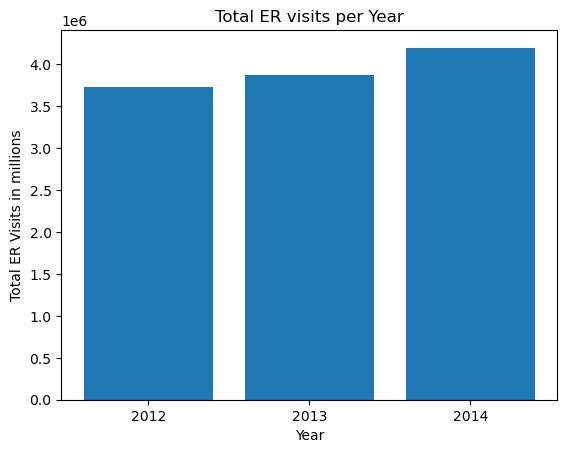

In [48]:
plt.title("Total ER visits per Year")
plt.ylabel("Total ER Visits in millions")
plt.xlabel("Year")
plt.bar(data_high_er["Year"].astype(str),data_high_er["Total ER Visits"])

## now we go for top Major Diagnostic Category 

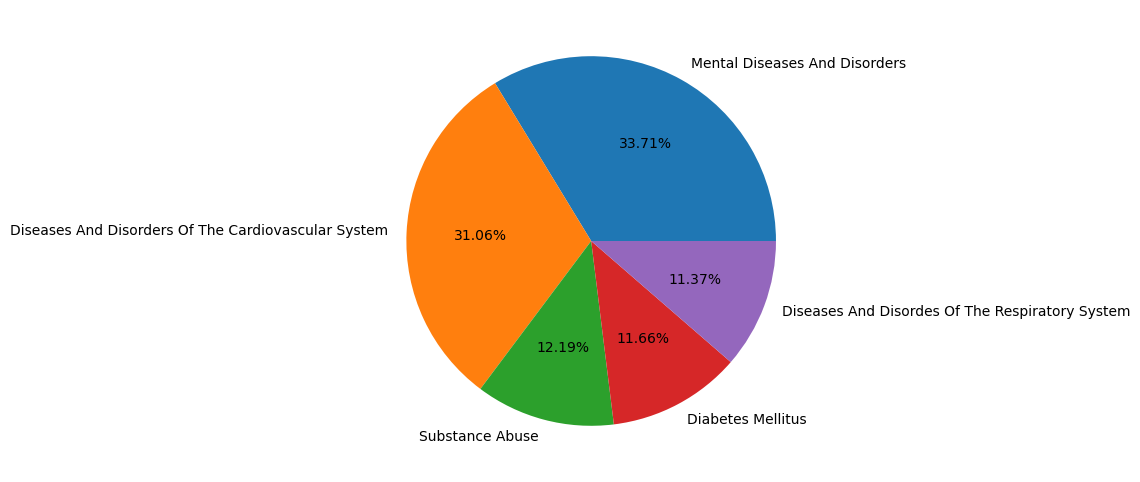

In [49]:
plot_digno_val = data["Major Diagnostic Category"].value_counts().values
plot_digno_idx = data["Major Diagnostic Category"].value_counts().index
plt.figure(figsize=(12,6))
plt.pie(plot_digno_val[:5],labels = plot_digno_idx[:5], autopct = '%1.2f%%')
plt.show()

## here we observe county which has highest total ER

In [50]:
data_con_plot = data.groupby(["Primary County"]).sum()["Total ER Visits"].sort_values(ascending = False).reset_index().rename(columns = {"Primary County":"county which has highes total ER"}).head(5)

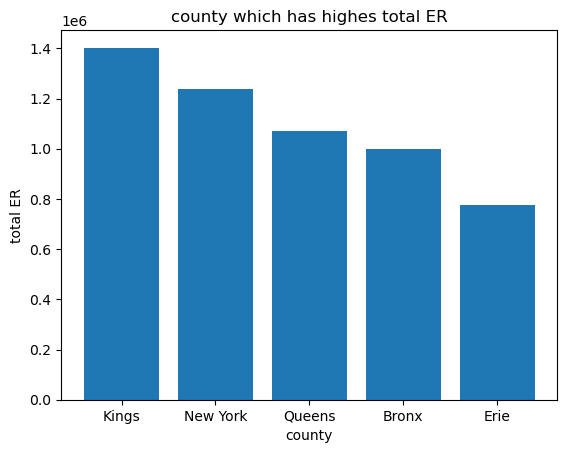

In [51]:
plt.title("county which has highes total ER")
plt.ylabel("total ER")
plt.xlabel("county")
plt.bar(data_con_plot["county which has highes total ER"],data_con_plot["Total ER Visits"])
plt.show()

## here we can see Episode Disease Category

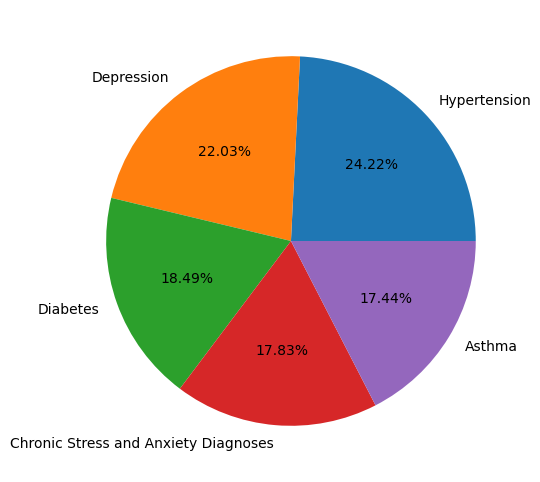

In [52]:
plot_dis_val = data["Episode Disease Category"].value_counts().values
plot_dis_idx = data["Episode Disease Category"].value_counts().index
plt.figure(figsize=(12,6))
plt.pie(plot_dis_val[:5],labels = plot_dis_idx[:5], autopct = '%1.2f%%')
plt.show()